# K Means Clustering
 Unsupervised Learning algorithm used to cluster unlabeled data. In unsupervised learning, we're not trying to predict any outcome but rather we're trying to figure out the patterns in the data or create labels for your data
# Examples of Clustering Problems
 1. Cluster Similar Documents
 2. Cluster Customers based on Features
 3. Market Segmentation
 4. Identify Similar Physical groups
# How it works
 1. Choose a number of Clusters, the "K" value.
 2. Randomly assign each point to a cluster
 3. Until cluster stop changing, repeat these steps:
     1. For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
     2. Assign each data point to the cluster for which the centroid is the closest

# Choosing a K value
  You can choose a K Value by using the elbow method. Calculate the sum of squared erro (SSE defined as the sum of the squared distance between each member of the cluster and its centroid) for some values of k and put them in a list
  Plotting K against the SSE shows that the error decreases as the k gets larger. This is because when the number of clusters increases, they should be smaller so the distortion is also smaller.
  So in this case we choose the k at which the SSE decreases abruptly. This produces an elbow effect in the graph.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#getting data from sklearn, for learning purposes. 
from sklearn.datasets import make_blobs

In [26]:
#create sample
data = make_blobs(n_samples=200,n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [28]:
data[0].shape

(200, 2)

In [33]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

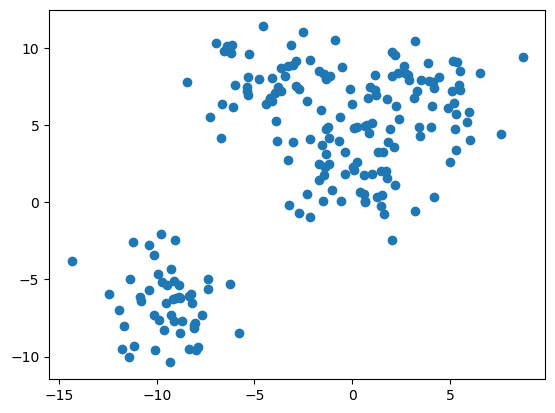

In [35]:
#plot data to see
plt.scatter(data[0][:,0], data[0][:,1])

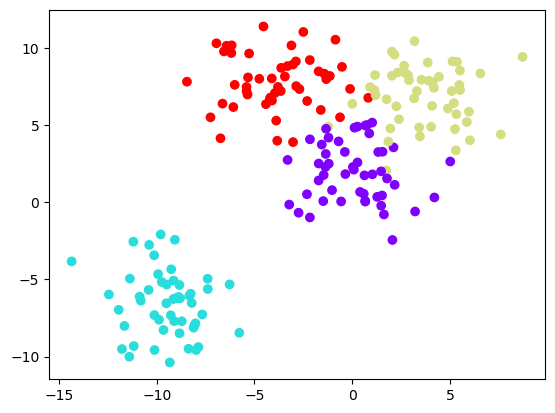

In [43]:
# Plot the data points using their x and y coordinates from data[0].
# data[1] contains the cluster labels (0, 1, 2, 3) assigned to each point by make_blobs.
# The 'c' argument uses these labels to color the points, and 'cmap' defines the color scheme.
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

In [78]:
#creating my kmeans model. Kmeans is unsupervised
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = '1' # to avoid memory leaker with KMeans algos

In [80]:
#create an object of the KMeans class
kmeans = KMeans(n_clusters=4) #same as the number of clusters in the blob. you can use any number of clusters you want, doesn't necessarily have to be the same as the center 

In [82]:
#fit data to model
kmeans.fit(data[0])

C:\Users\aduko\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [84]:
#find the centers
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [ 3.66465568,  6.97762652],
       [-0.03183854,  2.07689723],
       [-4.13591321,  7.95389851]])

In [91]:
kmeans.labels_ #on a real datset, this will be the final result

array([3, 1, 2, 1, 1, 0, 1, 2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 0, 3, 0, 2,
       2, 0, 3, 0, 0, 2, 1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 0, 2, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 2, 2, 3, 1, 2, 0, 3, 2, 2, 3, 1, 0, 1, 0, 3, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 3, 2, 2, 0, 1, 0, 2, 2, 2, 3,
       2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 1, 3, 2, 3, 2, 1, 3, 2, 0, 3, 3, 3,
       2, 0, 0, 3, 1, 3, 1, 2, 0, 1, 0, 3, 3, 1, 2, 0, 3, 3, 3, 3, 2, 1,
       2, 3, 1, 1, 1, 2, 1, 2, 2, 3, 0, 3, 2, 1, 3, 2, 1, 2, 3, 1, 2, 3,
       1, 1, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 1, 3, 0, 2, 1, 1,
       0, 2])

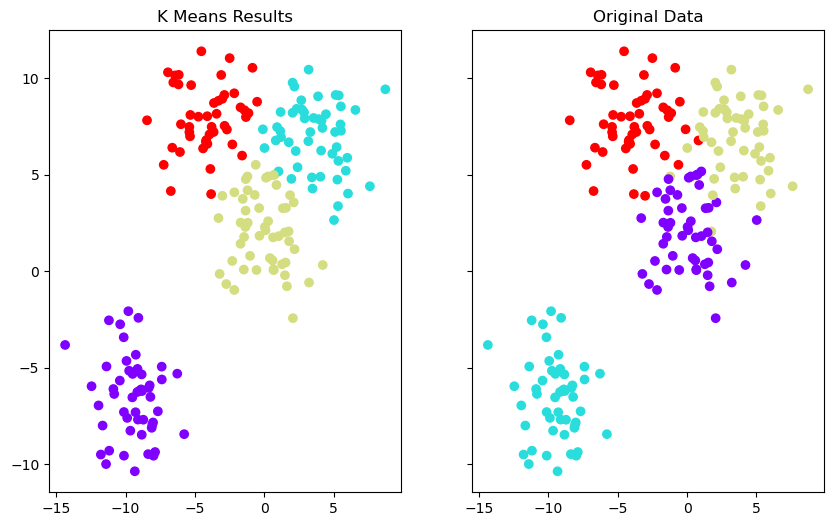

In [97]:
#plot the result and original to compare. No going to compare on a real dataset since we would have created the labels. datasets used for unsupervised learning have no labels
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True,figsize=(10,6))

ax1.set_title('K Means Results')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('Original Data')
ax2.scatter(data[0][:,0], data[0][:,1],c=data[1],cmap='rainbow')